In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import time
import pickle

import IPython.display as ipd
import librosa
import librosa.display

from glob import glob
from dotenv import load_dotenv
from my_functions.my_fun import *

In [2]:
load_dotenv()

AUDIO_DIR = os.getenv('PMEMO_AUDIO')
META_DIR = os.getenv('PMEMO_META')
ASSETS_DIR = os.getenv('ASSETS_DIR')

aux_dir = META_DIR.split('.')[0]
META_DIR = f'{aux_dir}_total.csv'


In [3]:
if not os.path.exists(AUDIO_DIR):
    print('el directorio de audios no se encontró')

if not os.path.exists(ASSETS_DIR):
    print('el directorio de assets no existe')
    
if not os.path.exists(META_DIR):
    print('el archivo de metadatos no existe')

# Cargar audios y metadatos

# Información de los audios

In [4]:
pmemo_meta = pd.read_csv(META_DIR)
pmemo_meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   musicId            767 non-null    int64  
 1   fileName           767 non-null    object 
 2   title              767 non-null    object 
 3   artist             767 non-null    object 
 4   album              760 non-null    object 
 5   duration           767 non-null    float64
 6   chorus_start_time  767 non-null    object 
 7   chorus_end_time    767 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 48.1+ KB


In [5]:
pmemo_meta.describe()

,musicId,duration
count,767.000000,767.000000
mean,493.770535,38.877562
std,285.958166,13.668968
min,1.000000,16.080000
25%,238.500000,29.110000
50%,495.000000,36.130000
75%,739.500000,46.130000
max,1000.000000,88.240000


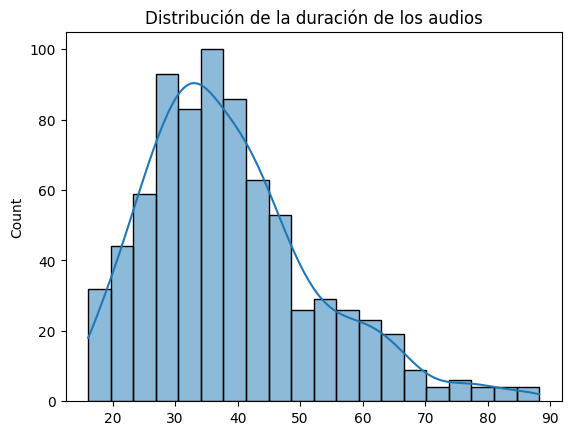

In [6]:
duracion = pmemo_meta['duration'].values

show_distribution(data=duracion,title='Distribución de la duración de los audios')

In [7]:
pmemo_meta.head()

,musicId,fileName,title,artist,album,duration,chorus_start_time,chorus_end_time
0,1,1.mp3,Good Drank,2 Chainz,"Def Jam Presents: Direct Deposit, Vol. 2",32.10,02:35,03:05
1,4,4.mp3,X Bitch (feat. Future),21 Savage,Savage Mode,28.09,03:00,03:26
2,5,5.mp3,No Heart,21 Savage,Savage Mode,84.23,00:41,02:03
3,6,6.mp3,Red Opps,21 Savage,Red Opps,29.53,02:16,02:44
4,7,7.mp3,Girls Talk Boys,5 Seconds Of Summer,Ghostbusters (Original Motion Picture Soundtrack),29.11,02:30,02:57


## Cargar los audios

In [8]:
audio_list = pmemo_meta['fileName'].values
print(audio_list.shape)

audio_files = glob(f'{AUDIO_DIR}\\*.mp3')
print(len(audio_files))

(767,)
794


In [9]:
audio_files[0]
aux = audio_files[0].split('\\')[-1]
aux

'1.mp3'

In [10]:
i = 0
_audio_files = []
for audio_file in audio_files:
    aux = audio_file.split('\\')[-1]
    if aux in audio_list:
         i+=1
         _audio_files.append(audio_file)

audio_files = _audio_files
print(len(audio_files))
print(len(audio_list))

767
767


## Ejemplo con una muestra aleatoria

In [11]:
rnd_idx = np.random.randint(low=0,high=len(audio_files))
aux_file = audio_files[rnd_idx].split('\\')[-1]
print(aux_file)
aux_meta =pmemo_meta.loc[pmemo_meta['fileName'] == aux_file] 
display(aux_meta)

60.mp3


,musicId,fileName,title,artist,album,duration,chorus_start_time,chorus_end_time
49,60,60.mp3,Light,Big Sean,I Decided.,47.15,02:19,03:04


In [12]:
ipd.Audio(audio_files[rnd_idx])

In [13]:
y,sr = librosa.load(audio_files[rnd_idx],duration=38)
print(f'y:{y[:20]}')
print(f'shape y: {y.shape}')
print(f'sr: {sr}')

y:[ 1.45519152e-11  4.00177669e-11  1.09139364e-11 -2.54658516e-11
 -1.09139364e-11 -7.27595761e-12 -1.01863407e-10 -6.18456397e-11
 -1.09139364e-11  7.27595761e-12  0.00000000e+00 -1.09139364e-10
 -2.18278728e-11  5.09317033e-11 -2.91038305e-11 -1.16415322e-10
 -7.09405867e-11  7.27595761e-11 -9.09494702e-11 -6.91215973e-11]
shape y: (837900,)
sr: 22050


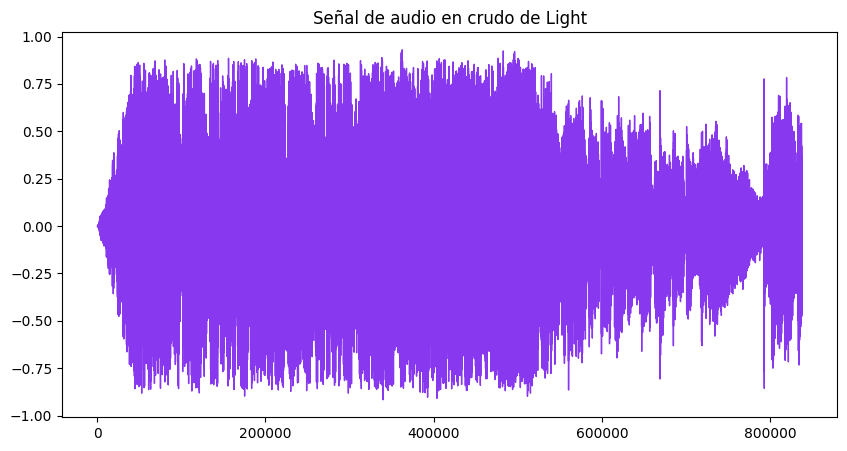

In [14]:
show_audio_signal(y,f"Señal de audio en crudo de {aux_meta['title'].values[0]}")

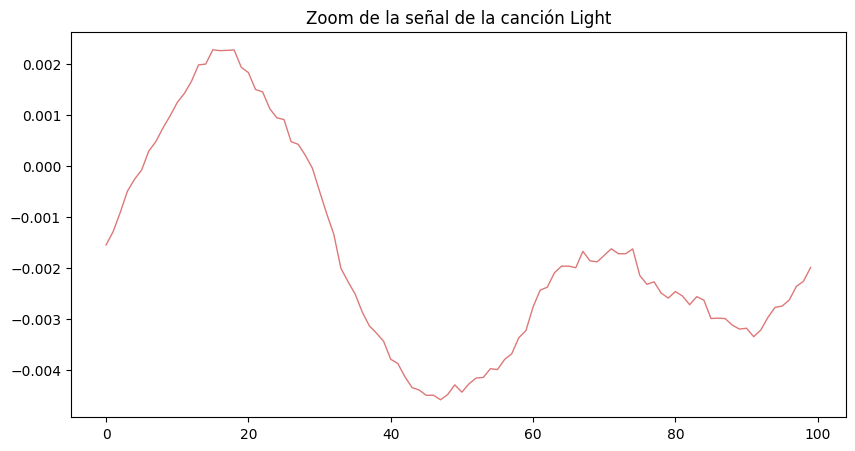

In [15]:
show_audio_signal(audio = pd.Series(y[1000:1100]),
                  title=f"Zoom de la señal de la canción {aux_meta['title'].values[0]}",
                  color='#dd7878')

### Chroma spectrogram

In [16]:
S = np.abs(librosa.stft(y))

chroma = librosa.feature.chroma_stft(S=S, sr=sr)
print(f'chroma: {chroma[:20]}')
print(f'shape chroma: {chroma.shape}')

chroma: [[0.6066082  0.36165646 0.23038365 ... 0.5001532  0.68181926 1.        ]
 [0.5936975  0.33888358 0.23667473 ... 0.23322737 0.23744659 0.42114756]
 [0.5836597  0.40559584 0.33231586 ... 0.26699662 0.21100767 0.37207937]
 ...
 [0.9920401  0.8957848  0.59370226 ... 0.28952146 0.21243098 0.26749426]
 [1.         0.6806941  0.39199913 ... 0.877656   0.5979386  0.44825286]
 [0.82129204 0.5151244  0.2599047  ... 1.         1.         0.87032545]]
shape chroma: (12, 1637)


In [17]:
crhoma_m = get_chromagram(audio=y,sr=sr) #Magnitud
print(f'chroma: {crhoma_m[:20]}')
print(f'shape chroma: {crhoma_m.shape}')

chroma: [[0.6066082  0.36165646 0.23038365 ... 0.5001532  0.68181926 1.        ]
 [0.5936975  0.33888358 0.23667473 ... 0.23322737 0.23744659 0.42114756]
 [0.5836597  0.40559584 0.33231586 ... 0.26699662 0.21100767 0.37207937]
 ...
 [0.9920401  0.8957848  0.59370226 ... 0.28952146 0.21243098 0.26749426]
 [1.         0.6806941  0.39199913 ... 0.877656   0.5979386  0.44825286]
 [0.82129204 0.5151244  0.2599047  ... 1.         1.         0.87032545]]
shape chroma: (12, 1637)


In [18]:
crhoma_p = get_chromagram(audio=y,sr=sr,power_spectrum=True) #power
print(f'chroma: {crhoma_p[:20]}')
print(f'shape chroma: {crhoma_p.shape}')

chroma: [[0.5172643  0.18762036 0.07645052 ... 0.2809282  0.54932255 1.        ]
 [0.38276464 0.1505488  0.08525938 ... 0.07650155 0.11011089 0.22251101]
 [0.3051111  0.17338738 0.12617701 ... 0.07069457 0.07131609 0.1379729 ]
 ...
 [1.         0.76695657 0.33415163 ... 0.08348641 0.0587584  0.0526934 ]
 [0.9355685  0.56108874 0.1633747  ... 0.9462495  0.49726665 0.17713153]
 [0.6935574  0.32092664 0.06849275 ... 1.         1.         0.854145  ]]
shape chroma: (12, 1637)
